# 2. Cardiovasular disease prediction

Data description (https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset?datasetId=107706&sortBy=voteCount)

There are 3 types of input features:

    Objective: factual information;
    Examination: results of medical examination;
    Subjective: information given by the patient.

Features:

    Age | Objective Feature | age | int (days)
    Height | Objective Feature | height | int (cm) |
    Weight | Objective Feature | weight | float (kg) |
    Gender | Objective Feature | gender | categorical code |
    Systolic blood pressure | Examination Feature | ap_hi | int |
    Diastolic blood pressure | Examination Feature | ap_lo | int |
    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | Subjective Feature | smoke | binary |
    Alcohol intake | Subjective Feature | alco | binary |
    Physical activity | Subjective Feature | active | binary |
    Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination. 

In [1620]:
import pandas as pd

df = pd.read_csv("../../_Data/ITHS_machine_learning_lab/cardio_train.csv", sep = ";")

df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [1621]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [1622]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## 2.0 EDA

In [1623]:
# a)
df["cardio"].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

<Axes: ylabel='cholesterol'>

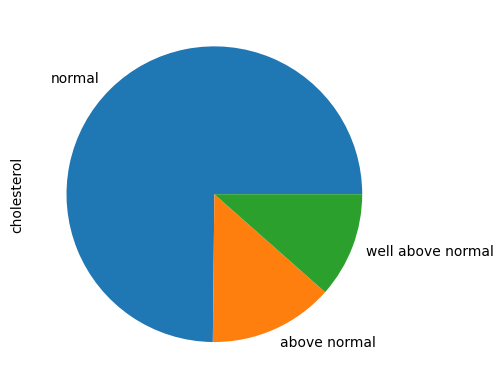

In [1625]:
# b)
df["cholesterol"].value_counts().plot(kind = "pie", labels = ["normal", "above normal", "well above normal"])

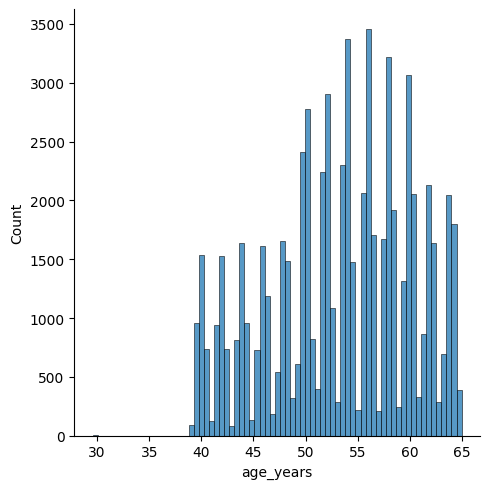

In [1626]:
# c)
import seaborn as sns

df["age_years"] = df["age"] / 365
sns.displot(df["age_years"])

In [1627]:
# d)
df["smoke"].value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

<Axes: xlabel='height', ylabel='Count'>

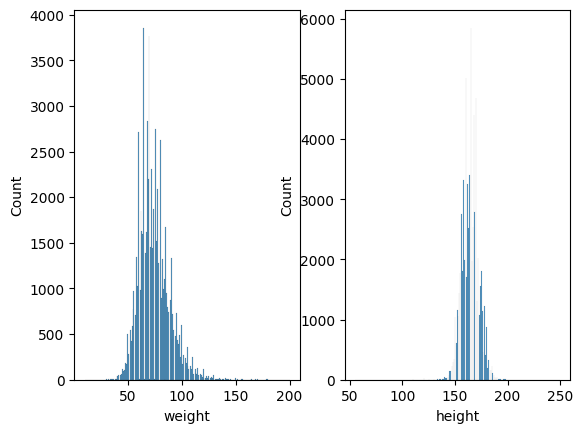

In [1628]:
# e-f)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)

sns.histplot(df["weight"], ax = ax[0])
sns.histplot(df["height"], ax = ax[1])

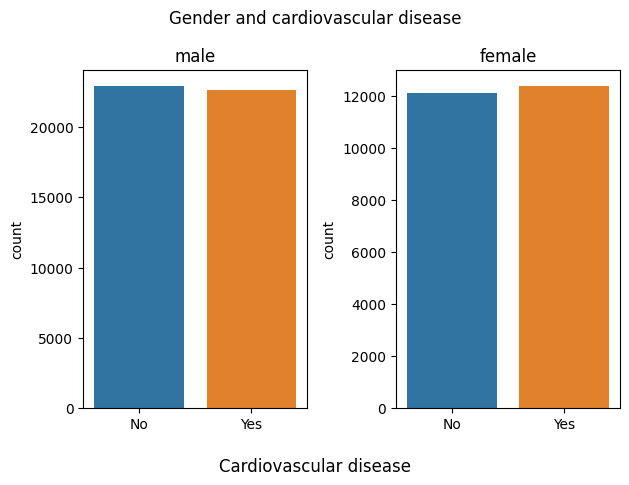

In [1629]:
# g)

fig, ax = plt.subplots(1,2)

for i, sex in enumerate(["male", "female"]):
    df_ = df[df["gender"] == i+1]
    sns.countplot(data= df_, x="cardio", ax=ax[i])
    ax[i].set_xticklabels(["No", "Yes"])
    ax[i].set_xlabel("")
    ax[i].set_title(sex)

fig.suptitle("Gender and cardiovascular disease")
fig.supxlabel("Cardiovascular disease")
fig.tight_layout()

## 2.1.0 Feature engineering - BMI

In [1630]:
df["bmi"] = df["weight"] / (df["height"]/100)**2

<Axes: >

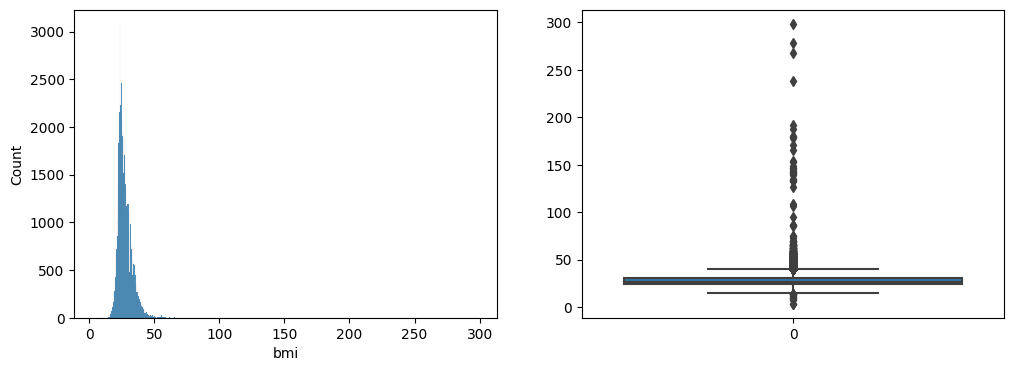

In [1631]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.histplot(df["bmi"], ax=ax[0]) # lots of extreme outliers
sns.boxplot(df["bmi"], ax=ax[1])

### a) Outliers

In [1632]:
# first get rid of extreme values to get sample mean and sample standard deviation more representative of population (for filtering using std)
print(f"Excluded {len(df[~df['height'].between(120,240)])} height outliers")
print(f"Excluded {len(df[~df['weight'].between(40,130)])} weight outliers")

df = df[df["height"].between(120,240)]
df = df[df["weight"].between(40,130)]

Excluded 53 height outliers
Excluded 254 weight outliers


Excluded 274 outliers based on height
Excluded 589 outliers based on weight
Excluded 601 outliers based on bmi
12.796254897018812 41.75053834062245


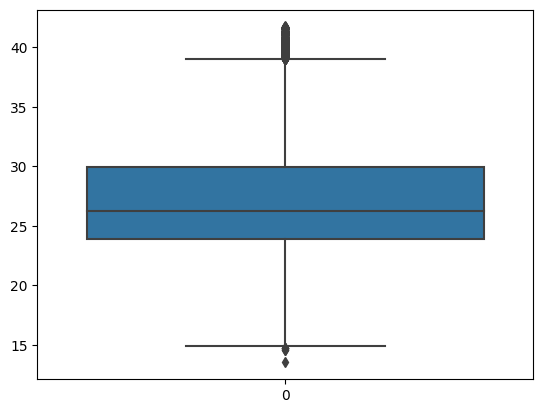

In [1633]:
# using 3 stdev instead of IQR because we want the full normal distribution
# BMI should be relatively normally distributed, so we can use the standard deviation of the data for outlier detection
# Using 3 standard deviations since the data set is very large
# Since height and weight define bmi, we first filter those

for i in ["height", "weight", "bmi"]:
    upper = df[i].mean() + 3 * df[i].std()
    lower = df[i].mean() - 3 * df[i].std()
    print(f"Excluded {len(df[~df[i].between(lower, upper)])} outliers based on {i}")
    df = df[df[i].between(lower, upper)]

sns.boxplot(df["bmi"])

print(lower, upper) # about (13, 42) seems reasonable

<Axes: xlabel='bmi', ylabel='Count'>

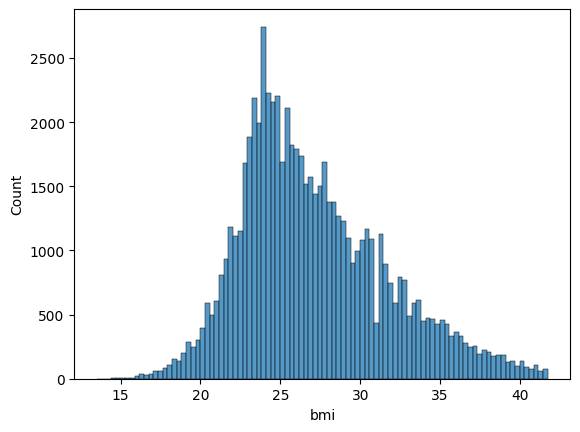

In [1634]:
# there is a slight positive skew which is in line with previously observed distributions of bmi
sns.histplot(df["bmi"])

### b) New BMI features

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'normal'),
  Text(1, 0, 'overweight'),
  Text(2, 0, 'obese (class I)'),
  Text(3, 0, 'obese (class II)'),
  Text(4, 0, 'obese (class III)')])

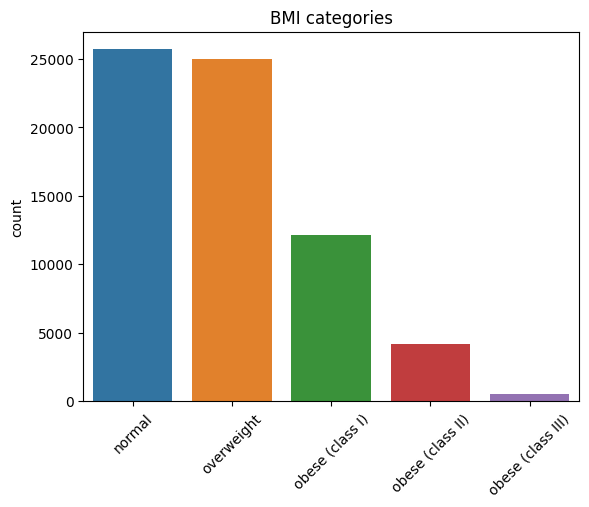

In [1635]:
# create bmi categories
df["bmi_class"] = None

class_list = [
    "normal",
    "overweight",
    "obese (class I)",
    "obese (class II)",
    "obese (class III)",
]
df.loc[df["bmi"].between(18.5, 25), "bmi_class"] = 1
df.loc[df["bmi"].between(25, 30), "bmi_class"] = 2
df.loc[df["bmi"].between(30, 35), "bmi_class"] = 3
df.loc[df["bmi"].between(35, 40), "bmi_class"] = 4
df.loc[df["bmi"] >= 40, "bmi_class"] = 5

fig, ax = plt.subplots()
sns.countplot(df, x="bmi_class", order=list(range(1,6)))
ax.set_title("BMI categories")
ax.set_xticklabels(class_list)
ax.set_xlabel("")
plt.xticks(rotation=45)

In [1636]:
df["bmi_class"].isna().sum() # 590 are underweight, and do not have a class

590

## 2.1.1 Feature engineering - Blood pressure

### a) Blood pressure outliers

In [1637]:
# blood pressure
df['ap_hi'].describe()

count    68236.000000
mean       128.633141
std        155.947504
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [1638]:
# exclude those whose diastolic bp is higher than their systolic bp
print(f"Excluded {len(df[~(df['ap_hi'] > df['ap_lo'])])} persons with diastolic bp higher than systolic bp")

df = df[df["ap_hi"] > df["ap_lo"]]

Excluded 1170 persons with diastolic bp higher than systolic bp


In [1639]:
# < 90: hypotension
# > 140: hypertension
# including 30 below and above (should not reach hypertensive crisis)
print(f"{len(df[~df['ap_hi'].between(60, 170)])} excluded based on ap_hi")
df = df[df["ap_hi"].between(60, 170)]

904 excluded based on ap_hi


In [1640]:
df["ap_lo"].describe()

count    66162.000000
mean        80.896224
std          9.197176
min          0.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        150.000000
Name: ap_lo, dtype: float64

In [1641]:
# > 90: hypertension
# < 60: hypotension
# including 20 below and above (should not reach hypertensive crisis)
print(f"{len(df[~df['ap_lo'].between(40, 110)])} excluded based on ap_lo")

df = df[df["ap_lo"].between(40, 110)]

128 excluded based on ap_lo


In [1642]:
df["ap_lo"].describe()

count    66034.000000
mean        80.891011
std          8.916372
min         40.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        110.000000
Name: ap_lo, dtype: float64

In [1643]:
# now use 3 std

for i in ["ap_lo", "ap_hi"]:
    upper = df[i].mean() + 3 * df[i].std()
    lower = df[i].mean() - 3 * df[i].std()
    print(f"Excluded {len(df[~df[i].between(lower, upper)])} outliers (mean +- 3 std) of {i}")
    df = df[df[i].between(lower, upper)]

Excluded 332 outliers (mean +- 3 std) of ap_lo
Excluded 52 outliers (mean +- 3 std) of ap_hi


### b) New bp features

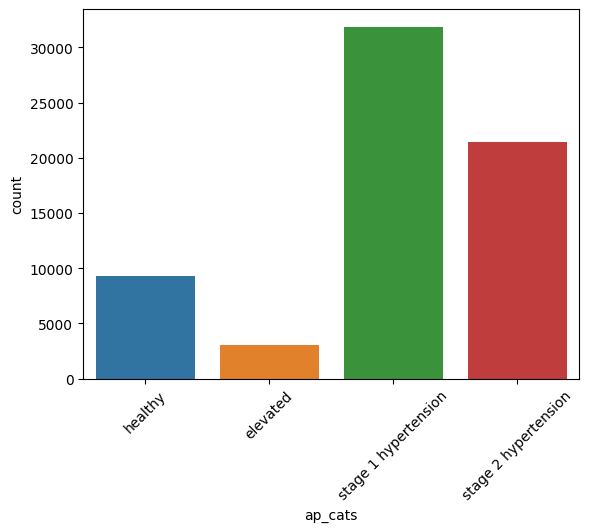

In [1644]:
cat_list = ["healthy", "elevated", "stage 1 hypertension", "stage 2 hypertension"]

df["ap_cats"] = None
df.loc[((df["ap_hi"] < 120) & (df["ap_lo"] < 80)), "ap_cats"] = 1
df.loc[((df["ap_hi"].between(120, 129)) & (df["ap_lo"] < 80)), "ap_cats"] = 2
df.loc[
    ((df["ap_hi"].between(130, 139)) | (df["ap_lo"].between(80, 89))), "ap_cats"
] = 3
df.loc[((df["ap_hi"] >= 140) | (df["ap_lo"] >= 90)), "ap_cats"] = 4
df["ap_cats"].value_counts()

fig, ax = plt.subplots()

sns.countplot(df, x="ap_cats", order = list(range(1,5)))
ax.set_xticklabels(cat_list)
plt.xticks(rotation=45);


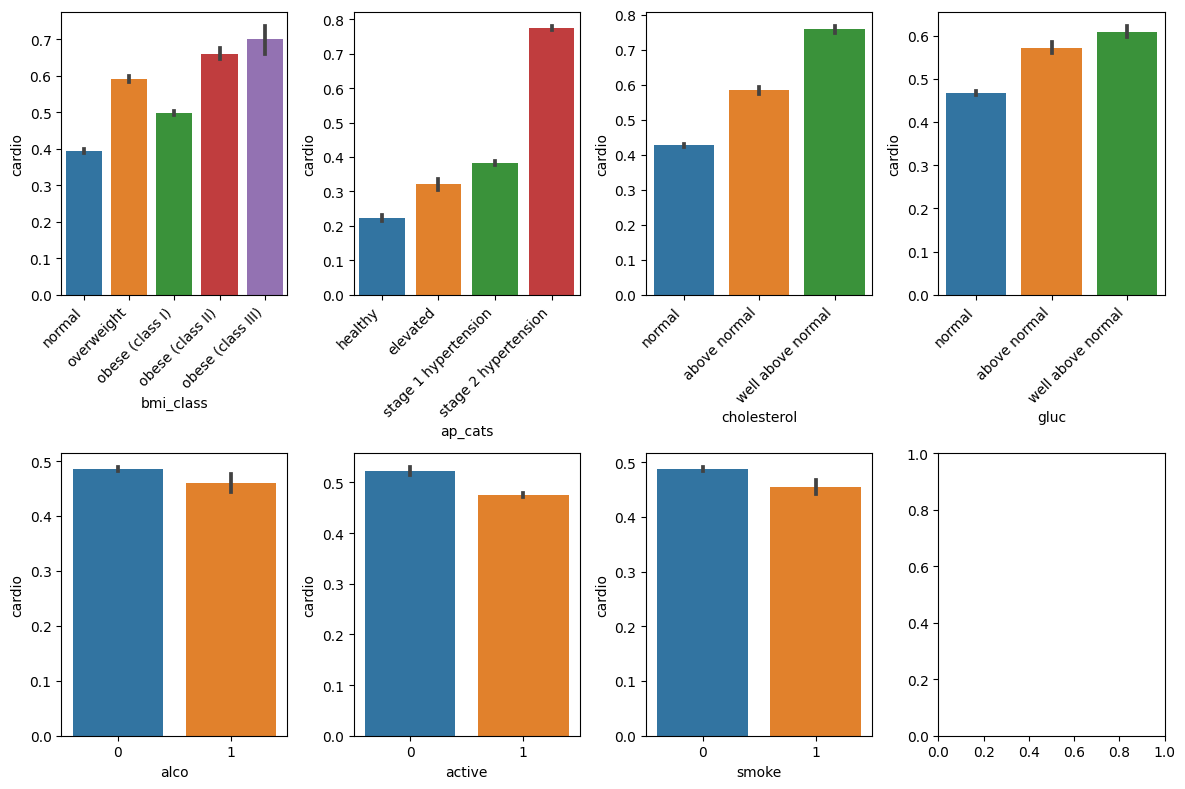

In [1645]:
# visualizing categorical features vs cardiovascular disease

fig, ax = plt.subplots(2,4, figsize = (12, 8))
ax = ax.flatten()

list_categorical = ["bmi_class", "ap_cats", "cholesterol", "gluc", "alco", "active", "smoke"]

for i, cat in enumerate(list_categorical):
    sns.barplot(df, x = cat, y = "cardio", ax = ax[i])

ax[0].set_xticklabels(class_list, rotation = 45, ha = "right")
ax[1].set_xticklabels(cat_list, rotation = 45, ha = "right")
ax[2].set_xticklabels(["normal", "above normal", "well above normal"], rotation = 45, ha = "right")
ax[3].set_xticklabels(["normal", "above normal", "well above normal"], rotation = 45, ha = "right")

fig.tight_layout()

# these all check out, except for alco, smoke
# alco finding could be explained by known moderate alcohol consumption association with cardiovascular health
# but smoking finding is strange

- Increased age is correlated with higher blood pressure and higher BMI
- Weight is also correlated with blood pressure and BMI (and height of course)
- Height is inversely correlated with BMI
- BMI and blood pressure are correlated with each other

<Axes: >

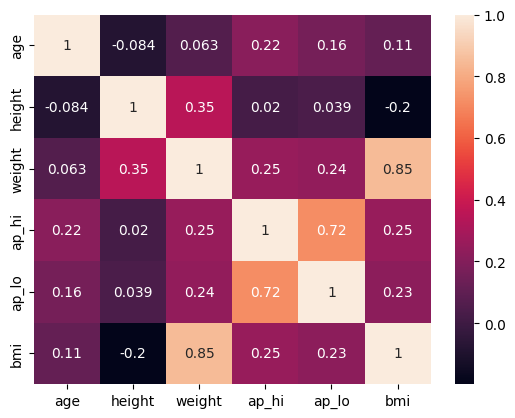

In [1646]:
# visualizing correlations
list_numerical = ["age", "height", "weight", "ap_hi", "ap_lo", "bmi"]

sns.heatmap(df.loc[:, list_numerical].corr(), annot=True)

In [1648]:
df["cardio"].value_counts() # still farily balanced after outlier removal

0    33838
1    31812
Name: cardio, dtype: int64

## Modeling

In [1649]:
# create two data sets

df["gender"] = pd.Categorical(df["gender"]) # specify categorical for one-hot encoding

df1 = df.drop(["id", "ap_hi", "ap_lo", "height", "weight", "bmi", "age_years"], axis=1)
# df2 should be better since actual bmi and bp has more granular information than categories
df2 = df.drop(["id", "bmi_class", "ap_cats", "height", "weight", 'age_years'], axis=1)

# pd.get_dummies(df2, drop_first=True)
hot_list = ["gender", "bmi_class", "ap_cats"]

df1_ones = pd.get_dummies(df[hot_list])
df1 = df1.drop(hot_list, axis=1)
df1 = df1.join(df1_ones)
df1.rename({"gender_2": "gender"}, axis=1, inplace=True)
df1 = df1.drop("gender_1", axis=1)

df2_ones = pd.get_dummies(df["gender"], drop_first=True)
df2_ones.rename({2: "gender"}, axis=1, inplace=True)
df2 = df2.drop("gender", axis=1)
df2 = df2.join(df2_ones)

df1.shape, df2.shape

/var/folders/j4/c638b8_s4256j6pd5ntzq7540000gn/T/ipykernel_55793/220589300.py:12: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df1_ones = pd.get_dummies(df[hot_list])
/var/folders/j4/c638b8_s4256j6pd5ntzq7540000gn/T/ipykernel_55793/220589300.py:12: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df1_ones = pd.get_dummies(df[hot_list])


((65650, 17), (65650, 11))

In [1650]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [1651]:
def splitter_scaler(df, scaler, validation_data=True):

    # train test split
    X,y = df.drop("cardio", axis=1), df["cardio"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if validation_data:
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)        

    # scaling the data    
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    if validation_data:
        X_val_scaled = scaler.transform(X_val)
        return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test
    else:
        return X_train_scaled, X_test_scaled, y_train, y_test

In [1652]:
def model_selector(model):

    classifier = GridSearchCV(
        model,
        param_grid=param_grids[model],
        cv=5,
        scoring="accuracy"
    )

    classifier.fit(X_train_scaled, y_train)
    # y_pred = classifier.predict(X_test_scaled)

    # return classifier, y_pred
    return classifier


In [1654]:
def model_collector():

    # setting up df for collection of model parameters and accuracy
    model_df0 = pd.DataFrame(columns=["model", "parameters", "accuracy"]) 
    
    reports0 = {}
    graphs0 = {}
    models0 = {}    

    # loop to plot confusion matrices and fill up model_df
    for i, model in enumerate(model_list):

        classifier = model_selector(model)
        y_pred = classifier.predict(X_val_scaled)

        model_name = str(model).split("(")[0]
        params = classifier.best_params_
        # (param_name, param_value), = classifier.best_params_.items()        
        accuracy = accuracy_score(y_val, y_pred)

        # summarize model in df
        model_df0.loc[i] = [model_name, params, accuracy]

        # save confusion matrix graph in a dictionary
        cm = confusion_matrix(y_val, y_pred)
        graphs0[model_name] = ConfusionMatrixDisplay(cm)
        
        # save classification reports in a dictionary
        reports0[model_name] = classification_report(y_val, y_pred)

        # save optimal model in a dictionary
        models0[model_name] = classifier.best_estimator_

    return model_df0, models0, reports0, graphs0

## 2.4. Choosing the best model

In [1813]:
model_KNN = KNeighborsClassifier()
model_logistic = LogisticRegression(
    penalty="elasticnet", solver="saga", multi_class="auto", max_iter=10000
)
model_rf = RandomForestClassifier(random_state=42)
# model_SVM = LinearSVC(dual=False) # dual=False when n_samples > n_features
# model_SVM = SVC(kernel='linear', probability=True)

param_grids = {
    model_KNN:  {"n_neighbors": list(range(50, 120, 5))},
    model_logistic: {"l1_ratio": np.linspace(0, 1, 10)},
    model_rf: {"n_estimators": [100, 150], "max_depth": [5, 10, 15]}
    # model_SVM: {"C": np.linspace(0.001,1,100)}
}
# param_grids = {
#     model_KNN:  {"n_neighbors": [100]},
#     model_logistic: {"l1_ratio": [0]},
#     model_rf: {"n_estimators": [150], "max_depth": [10]}
# }

model_list = [i for i in param_grids.keys()]

In [1814]:
# collect summary df, reports and graphs

model_df = pd.DataFrame()
reports = {}
graphs = {}
models = {}

for i, df in enumerate([df1, df2]):

    reports2 = {}
    graphs2 = {}
    models2 = {}

    for scaler in [StandardScaler(), MinMaxScaler()]:

        X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test = splitter_scaler(df, scaler)

        model_df1, models1, reports1, graphs1 = model_collector()
        model_df1["scaler"] = str(scaler)
        model_df1["df"] = i+1
        
        reports2[str(scaler).strip("()")] = reports1
        graphs2[str(scaler).strip("()")] = graphs1
        models2[str(scaler).strip("()")] = models1


        model_df = pd.concat([model_df, model_df1])

    reports["df" + str(i+1)] = reports2
    graphs["df" + str(i+1)] = graphs2
    models["df" + str(i+1)] = models2



In [1815]:
model_df.sort_values(by = "accuracy", ascending=False)
# df2 is better. scaler type does not seem to matter much
# random forest clf performs the best, logistic regression the worst

,model,parameters,accuracy,scaler,df
2,RandomForestClassifier,"{'max_depth': 10, 'n_estimators': 150}",0.734101,StandardScaler(),2
2,RandomForestClassifier,"{'max_depth': 10, 'n_estimators': 100}",0.733435,MinMaxScaler(),2
0,KNeighborsClassifier,{'n_neighbors': 75},0.728865,StandardScaler(),2
2,RandomForestClassifier,"{'max_depth': 10, 'n_estimators': 150}",0.727913,StandardScaler(),1
2,RandomForestClassifier,"{'max_depth': 10, 'n_estimators': 150}",0.727818,MinMaxScaler(),1
0,KNeighborsClassifier,{'n_neighbors': 60},0.727628,MinMaxScaler(),2
1,LogisticRegression,{'l1_ratio': 0.0},0.725819,StandardScaler(),2
1,LogisticRegression,{'l1_ratio': 0.5555555555555556},0.725819,MinMaxScaler(),2
0,KNeighborsClassifier,{'n_neighbors': 105},0.724105,MinMaxScaler(),1
0,KNeighborsClassifier,{'n_neighbors': 115},0.724010,StandardScaler(),1


### Choose a data set, scaler and model and retrain the data

In [1947]:
X_train_scaled, X_test_scaled, y_train, y_test = splitter_scaler(
    df2, StandardScaler(), validation_data=False
)

model_final = models["df2"]["StandardScaler"]["RandomForestClassifier"].fit(
    X_train_scaled, y_train
)
y_pred = model_final.predict(X_test_scaled)

graphs["df2-test"] = {}
graphs["df2-test"]["RandomForestClassifier"] = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred)
)

reports["df2-test"] = {}
reports["df2-test"]["RandomForestClassifier"] = classification_report(
    y_test, y_pred, digits=3
)

print(
    f"Final Random Forest clf model accuracy on test data: {accuracy_score(y_test, y_pred)}"
)

Final Random Forest clf model accuracy on test data: 0.734044173648134


## 2.5 Ensemble

In [1948]:
from sklearn.ensemble import VotingClassifier

X_train_scaled, X_test_scaled, y_train, y_test = splitter_scaler(df2, StandardScaler(), validation_data=False)

# https://www.geeksforgeeks.org/ml-voting-classifier-using-sklearn/
# group / ensemble of models
estimator = [(name, model) for name, model in models["df2"]["StandardScaler"].items()]

# hard voting: majority vote
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train_scaled, y_train)
y_pred = vot_hard.predict(X_test_scaled)
  
# save graph and report
graphs["df2-test"]["Ensemble-Hard"] = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
reports["df2-test"]["Ensemble-Hard"] = classification_report(y_test,y_pred, digits=3)
print(f"Hard Voting Classifier accuracy on test data: {accuracy_score(y_test, y_pred)}")
  
# soft voting: average probabilities used for vote
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train_scaled, y_train)
y_pred = vot_soft.predict(X_test_scaled)
  
# save graph and report
graphs["df2-test"]["Ensemble-Soft"] = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
reports["df2-test"]["Ensemble-Soft"] = classification_report(y_test,y_pred, digits=3)
print(f"Soft Voting Classifier accuracy on test data: {accuracy_score(y_test, y_pred)}")

Hard Voting Classifier accuracy on test data: 0.732977913175933
Soft Voting Classifier accuracy on test data: 0.7328255902513329


## 2.6 Evaluations

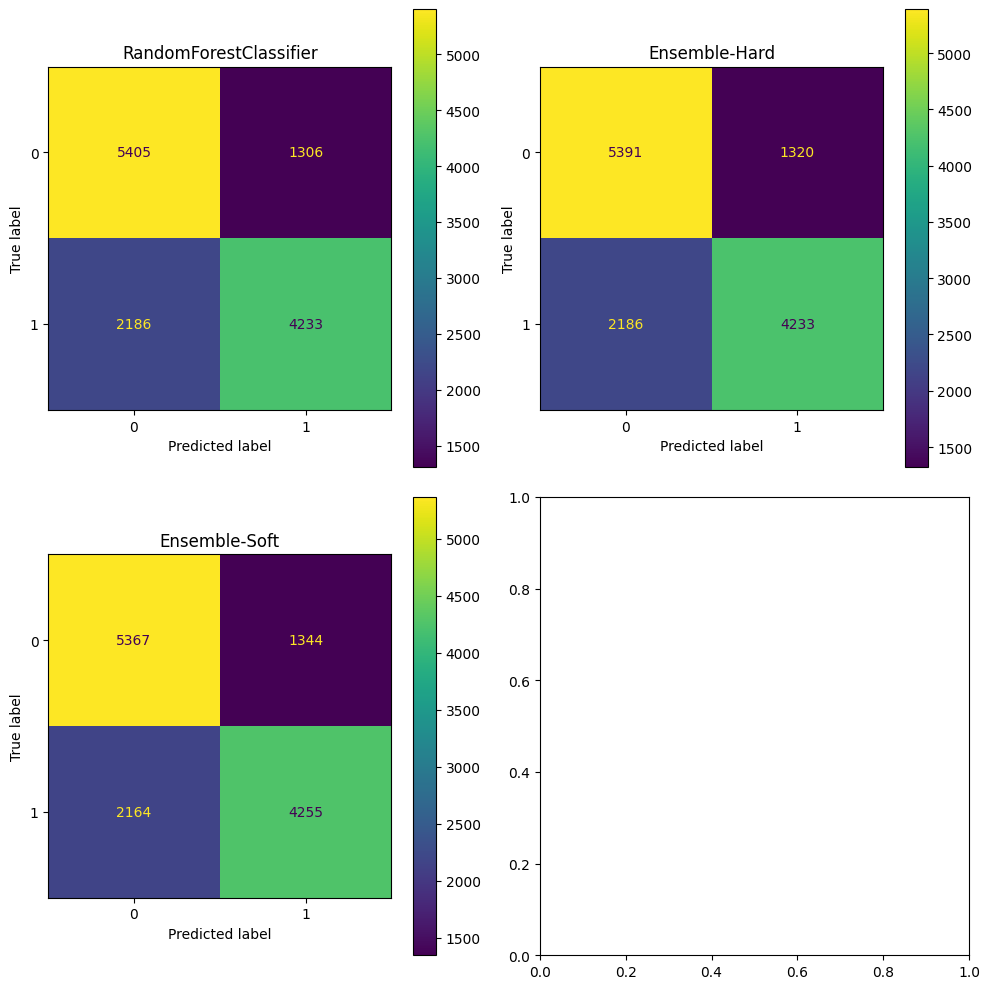

In [1940]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()

for i, (name, graph) in enumerate(graphs["df2-test"].items()):
    graph.plot(ax = axes[i])
    axes[i].set_title(f"{name}")

# fig.suptitle(f"df2 (standardized) - Evaluated on validation data")
fig.tight_layout()

In [1952]:
for i, (name, report) in enumerate(reports["df2-test"].items()):
    print(name)
    print(report)

RandomForestClassifier
              precision    recall  f1-score   support

           0      0.712     0.805     0.756      6711
           1      0.764     0.659     0.708      6419

    accuracy                          0.734     13130
   macro avg      0.738     0.732     0.732     13130
weighted avg      0.738     0.734     0.732     13130

Ensemble-Hard
              precision    recall  f1-score   support

           0      0.711     0.803     0.755      6711
           1      0.762     0.659     0.707      6419

    accuracy                          0.733     13130
   macro avg      0.737     0.731     0.731     13130
weighted avg      0.736     0.733     0.731     13130

Ensemble-Soft
              precision    recall  f1-score   support

           0      0.713     0.800     0.754      6711
           1      0.760     0.663     0.708      6419

    accuracy                          0.733     13130
   macro avg      0.736     0.731     0.731     13130
weighted avg      0.736

## 2.7 Deploy

In [1782]:
import joblib

df2.sample(100, random_state=42).to_csv("test_samples.csv")

new_df_test = pd.read_csv("./test_samples.csv", index_col=0)

new_df = df2.drop(new_df_test.index)
new_df

# model_final.fit(new_df)
# joblib.dump(model_final, "model_final.pkl")

# model = joblib.load()
# model.predict(new_df_test)


,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,gender
0,18393,110,80,1,1,0,0,1,0,21.967120,1
1,20228,140,90,3,1,0,0,1,1,34.927679,0
2,18857,130,70,3,1,0,0,0,1,23.507805,0
3,17623,150,100,1,1,0,0,1,1,28.710479,1
4,17474,100,60,1,1,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...
69993,19699,130,90,1,1,0,0,1,1,23.661439,0
69994,21074,150,80,1,1,0,0,1,1,29.384757,0
69995,19240,120,80,1,1,1,0,1,0,26.927438,1
69998,22431,135,80,1,2,0,0,0,1,27.099251,0
